# Pre-processing steps and Exploratory Data Analysis  

## Import Necessary Packages

In [135]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import roc_auc_score 
import seaborn as sns
from sklearn.metrics import accuracy_score

## Reading in files

In [33]:
c_employee = pd.read_csv('comments_employee_mapping.csv')

In [34]:
c_like = pd.read_csv('comments_likeability.csv')

In [35]:
emp_attr = pd.read_csv('employee_attrition.csv')

In [36]:
h_level = pd.read_csv('happiness_level.csv')

## EDA

In [37]:
c_employee.head()

,employee,companyAlias,commentId,commentDate
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,Mon Mar 20 19:00:17 CET 2017
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,Mon Mar 20 18:55:16 CET 2017
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,Mon Mar 20 16:44:02 CET 2017
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,Mon Mar 20 16:06:08 CET 2017
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,Mon Mar 20 14:30:50 CET 2017


In [38]:
c_like.head()

,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
3,24,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
4,382,56aec740f1ef260003e307d6,True,False,58d0179ae010990004e3806d


In [39]:
emp_attr.head()

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,Thu Feb 23 12:48:04 CET 2017,True
1,2,56aec740f1ef260003e307d6,72,Fri Mar 17 01:00:00 CET 2017,True
2,487,56aec740f1ef260003e307d6,14,Sat Nov 19 15:02:14 CET 2016,False
3,3,56aec740f1ef260003e307d6,22,Thu Feb 16 01:00:00 CET 2017,True
4,4,56aec740f1ef260003e307d6,195,Mon Mar 20 01:00:00 CET 2017,True


In [40]:
h_level.head()

,employee,companyAlias,voteDate,vote
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
3,94,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
4,16,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,2


In [41]:
np.sum(emp_attr['stillExists']==True)

3673

### From the above, we see that a large number of employees still remain in the company. This might lead to large imbalance in our dataset for classification 

In [42]:
l = 0
for i in pd.unique(h_level['companyAlias']):
    l += pd.unique(h_level['employee'][h_level['companyAlias']==i]).shape[0]

In [43]:
print("Total Number of Unique Employees in Happiness Level Dataset:", l)

Total Number of Unique Employees in Happiness Level Dataset: 4377


In [44]:
l = 0
for i in pd.unique(c_like['companyAlias']):
    l += pd.unique(c_like['employee'][c_like['companyAlias']==i]).shape[0]
print("Total Number of Unique Employees in the Likeability Dataset:", l)

Total Number of Unique Employees in the Likeability Dataset: 3147


### From the above, we see that there is a considerable difference between the total number of employees and the employees who have participated in the app at least once

In [45]:
ne = []
for i in pd.unique(h_level['companyAlias']):
     ne.append(pd.unique(h_level['employee'][h_level['companyAlias']==i]).shape[0])

Employees per company


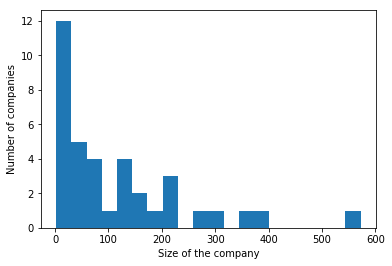

In [46]:
print("Employees per company")
plt.hist(ne, bins=20)
plt.xlabel('Size of the company')
plt.ylabel('Number of companies')
plt.show()

### From the above, we see that a large number of companies have a low number of exployees and vice-versa. 

### Since employeeIds are repeated across companies, wee now create unique Id's for every (employee, company) pair  

### Creating unique IDs for every employee by combining 'companyAlias' and 'employee id'

In [47]:
h_level['combined'] = h_level['employee'].map(str) + '_' + h_level['companyAlias']
emp_attr['combined'] = emp_attr['employee'].map(str) + '_' + emp_attr['companyAlias']
c_like['combined'] = c_like['employee'].map(str) + '_' + c_like['companyAlias']
c_employee['combined'] = c_employee['employee'].map(str) + '_' + c_employee['companyAlias']

### Visualization - Attrition vs Happiness level

In [48]:
e = emp_attr.groupby(['combined']).mean()['stillExists']
h = h_level.groupby(['combined']).mean()['vote'] 

Text(0.5,0,'stillExists')

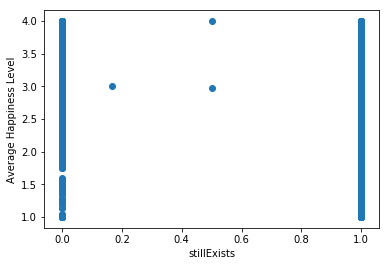

In [49]:
plt.scatter(e,h)
plt.ylabel('Average Happiness Level')
plt.xlabel('stillExists')

### Visualization - Histogram Plots of Happiness levels separated by 'stillExists'

In [50]:
mask0 = emp_attr.groupby(['combined']).mean()['stillExists']==0.0
mask1 = emp_attr.groupby(['combined']).mean()['stillExists']==1.0

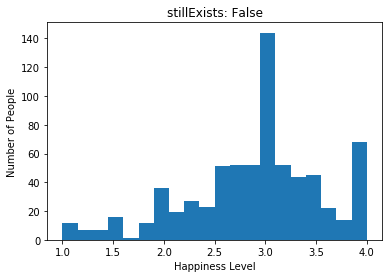

In [51]:
plt.hist(h.loc[mask0], bins=20)
plt.xlabel('Happiness Level')
plt.ylabel('Number of People')
plt.title('stillExists: False')
plt.show()

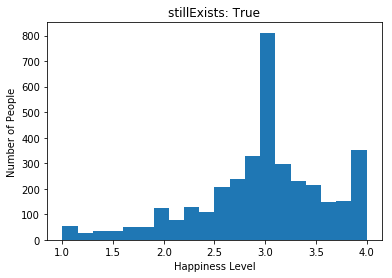

In [52]:
plt.hist(h.loc[mask1], bins=20)
plt.xlabel('Happiness Level')
plt.ylabel('Number of People')
plt.title('stillExists: True')
plt.show()

### From the above, we see that there is only a slight difference in the difference in the distributions of the happiness levels between people who left and people who didn't 

### For further analysis, we groupby the combined ID and take the mean of the features 

In [53]:
ndf = emp_attr.groupby(['combined']).mean()

### Grouping all datasets by 'combined id' to inspect various features

### Creating a new feature 'vote', which stores the mean happiness level of every employee 

In [54]:
ndf['vote'] = h_level.groupby(['combined']).mean()['vote']

In [55]:
ndf.head()

,employee,numVotes,stillExists,vote
combined,,,,
100_53a2dd43e4b01cc02f1e9011,100.0,247.0,1.0,1.004049
100_54e52607e4b01191dc064966,100.0,169.0,0.0,2.213018
100_5641f96713664c000332c8cd,100.0,102.0,1.0,2.137255
100_56aec740f1ef260003e307d6,100.0,187.0,1.0,4.000000
100_56e2a905e3b6fe0003e32855,100.0,4.0,1.0,3.750000


In [56]:
c_employee.groupby(['combined']).count()['employee'].head()

combined
100_53a2dd43e4b01cc02f1e9011    36
100_5641f96713664c000332c8cd    46
100_56aec740f1ef260003e307d6    60
100_5742d699f839a10003a407d2    30
100_574c423856b6300003009953    26
Name: employee, dtype: int64

###  Creating a new variable 'n_comm' which stores the number of comments made by every employee

In [57]:
ndf['n_comm'] = c_employee.groupby(['combined']).count()['employee']

In [58]:
ndf.head()

,employee,numVotes,stillExists,vote,n_comm
combined,,,,,
100_53a2dd43e4b01cc02f1e9011,100.0,247.0,1.0,1.004049,36.0
100_54e52607e4b01191dc064966,100.0,169.0,0.0,2.213018,NaN
100_5641f96713664c000332c8cd,100.0,102.0,1.0,2.137255,46.0
100_56aec740f1ef260003e307d6,100.0,187.0,1.0,4.000000,60.0
100_56e2a905e3b6fe0003e32855,100.0,4.0,1.0,3.750000,NaN


### Filling NaNs by 0s to indicate no activity  

In [59]:
ndf.fillna(0, inplace=True)

In [60]:
ndf.head()

,employee,numVotes,stillExists,vote,n_comm
combined,,,,,
100_53a2dd43e4b01cc02f1e9011,100.0,247.0,1.0,1.004049,36.0
100_54e52607e4b01191dc064966,100.0,169.0,0.0,2.213018,0.0
100_5641f96713664c000332c8cd,100.0,102.0,1.0,2.137255,46.0
100_56aec740f1ef260003e307d6,100.0,187.0,1.0,4.000000,60.0
100_56e2a905e3b6fe0003e32855,100.0,4.0,1.0,3.750000,0.0


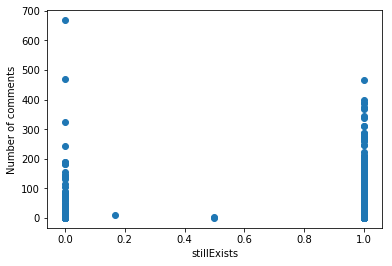

In [61]:
plt.scatter(ndf['stillExists'], ndf['n_comm'])
plt.xlabel('stillExists')
plt.ylabel('Number of comments')
plt.show()

### From the plot above, we see that people who leave the company posted relatively fewer comments than people who remain in the company

In [62]:
ndf.shape

(4377, 5)

### If the mean of 'stillExists' feature is less than 1, this means that the employee has left the company (Assuming the person doesn't rejoin after leaving once)

In [63]:
ndf['stillExists'].loc[ndf['stillExists']<1]=0

In [64]:
mask0 = ndf['stillExists'] == 0.0
mask1 = ndf['stillExists'] == 1.0

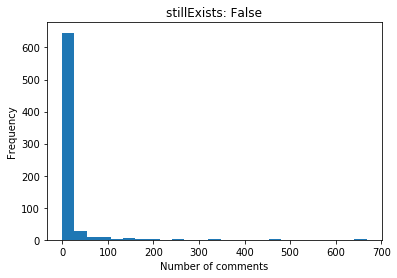

In [65]:
plt.hist(ndf['n_comm'].loc[mask0], bins=25)
plt.xlabel('Number of comments')
plt.ylabel('Frequency')
plt.title('stillExists: False')
plt.show()

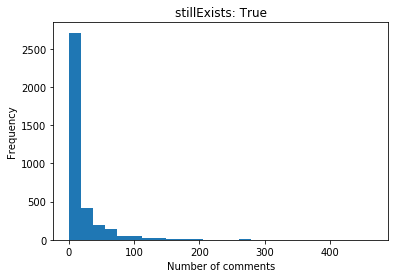

In [66]:
plt.hist(ndf['n_comm'].loc[mask1], bins=25)
plt.xlabel('Number of comments')
plt.ylabel('Frequency')
plt.title('stillExists: True')
plt.show()

In [67]:
ndf.head()

,employee,numVotes,stillExists,vote,n_comm
combined,,,,,
100_53a2dd43e4b01cc02f1e9011,100.0,247.0,1.0,1.004049,36.0
100_54e52607e4b01191dc064966,100.0,169.0,0.0,2.213018,0.0
100_5641f96713664c000332c8cd,100.0,102.0,1.0,2.137255,46.0
100_56aec740f1ef260003e307d6,100.0,187.0,1.0,4.000000,60.0
100_56e2a905e3b6fe0003e32855,100.0,4.0,1.0,3.750000,0.0


### Computing and creating new features for number of likes, dislikes and total number of likes and dislikes given and received by the employees 

In [68]:
count_react = c_like.groupby(['commentId']).count()['employee']

In [69]:
count_like = c_like.groupby(['commentId']).sum()['liked']
count_dislike = c_like.groupby(['commentId']).sum()['disliked']

In [70]:
c_employee.set_index(['commentId'], inplace=True)

In [71]:
c_employee['react'] = count_react
c_employee['liked'] = count_like
c_employee['disliked'] = count_dislike

In [72]:
c_employee.fillna(0, inplace=True)

In [73]:
c_employee.reset_index(inplace=True)

In [74]:
c_employee.groupby(['combined']).mean().shape[0]

2881

#### Creating new features : Reacts, likes, dislikes recieved on a comment

In [75]:
ndf['react_rec'] = c_employee.groupby(['combined']).mean()['react']
ndf['dislike_rec'] = c_employee.groupby(['combined']).mean()['disliked']
ndf['like_rec'] = c_employee.groupby(['combined']).mean()['liked']

In [76]:
ndf.fillna(0, inplace=True)

In [77]:
n_react = c_like.groupby(['combined']).count()['employee']

#### Creating new features : Reacts, likes, dislikes given on a comment  

In [78]:
n_like_giv = c_like.groupby(['combined']).sum()['liked']
n_dislike_giv = c_like.groupby(['combined']).sum()['disliked']

In [79]:
ndf['react_giv'] = n_react
ndf['dislike_giv'] = n_like_giv
ndf['like_giv'] = n_dislike_giv

In [80]:
n_react.shape

(3147,)

In [81]:
ndf.fillna(0, inplace=True)

In [82]:
ndf.reset_index(inplace=True)

In [83]:
ndf.drop(['employee'], axis=1, inplace=True)

In [84]:
ndf.head()

,combined,numVotes,stillExists,vote,n_comm,react_rec,dislike_rec,like_rec,react_giv,dislike_giv,like_giv
0,100_53a2dd43e4b01cc02f1e9011,247.0,1.0,1.004049,36.0,5.166667,2.277778,2.888889,115.0,60.0,55.0
1,100_54e52607e4b01191dc064966,169.0,0.0,2.213018,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,100_5641f96713664c000332c8cd,102.0,1.0,2.137255,46.0,25.608696,6.000000,19.608696,281.0,191.0,90.0
3,100_56aec740f1ef260003e307d6,187.0,1.0,4.000000,60.0,6.266667,0.833333,5.433333,290.0,288.0,2.0
4,100_56e2a905e3b6fe0003e32855,4.0,1.0,3.750000,0.0,0.000000,0.000000,0.000000,11.0,11.0,0.0


### Creating new features for percentages of likes and dislikes 

In [85]:
ndf['per_like_rec'] = ndf['like_rec']/(ndf['react_rec']+1)
ndf['per_dislike_rec'] = ndf['dislike_rec']/(ndf['react_rec']+1)
ndf['per_like_giv'] = ndf['like_giv']/(ndf['react_giv']+1)
ndf['per_dislike_giv'] = ndf['dislike_giv']/(ndf['react_giv']+1)
    
df = ndf.drop(['like_rec', 'dislike_rec', 'react_rec', 'like_giv', 'dislike_giv', 'react_giv'], axis=1)

### In all of the features above, we haven't considered peer to peer interactions of the employees. This might be an important feature to consider the peer group of a particular employee. So we create an adjacency list.

### Creating an adjacency list of all employees with each entry corresponding to the inverse of the number of likes given by the row_employee to the column_employee

In [12]:
adj, r, y = adjacency_matrix(c_employee, c_like, emp_attr, h_level)
adj

,0,1,2,3,4,5,6,7,8,9,...,4367,4368,4369,4370,4371,4372,4373,4374,4375,4376
0,0.028571,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,...,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,...,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.000000,1.0,0.021277,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,...,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.000000,1.0,1.000000,0.090909,1.000000,1.0,1.000000,1.0,1.0,1.0,...,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,...,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,...,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.000000,1.0,1.000000,1.000000,1.000000,1.0,0.090909,1.0,1.0,1.0,...,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,...,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,...,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,...,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### The idea behind inverting them is as follows: more the likes between two people, more the similarity between them. Hence inverting the number of likes decreases the distance between the people with more likes. 

In [22]:
print('Number of components required to capture 95% variance: {}'.format(y))

Number of components required to capture 95% variance: 155


In [27]:
r

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
0,-0.090705,0.001396,-0.097366,0.192744,-0.362536,-0.179462,-0.039794,0.059350,-0.278663,-0.145800,...,-0.014639,-0.217164,-0.094562,-0.168392,0.079126,0.062534,-0.200243,-0.057157,-0.123476,-0.117042
1,-0.079786,0.001213,-0.084279,0.164809,-0.303156,-0.127242,-0.024156,0.035490,-0.159736,-0.055672,...,0.002221,0.000248,0.002794,0.000609,-0.002780,0.001692,-0.000708,0.000825,0.007188,-0.002270
2,-1.228946,6.024055,4.367334,-2.064978,1.658482,0.174893,0.023610,-0.033970,0.145164,0.040001,...,-0.065793,0.023218,-0.065862,-0.064154,-0.014755,0.013568,0.023194,0.209013,-0.090895,-0.178136
3,-0.528655,0.019608,-2.496442,-2.855254,1.316923,0.067595,0.004824,-0.006436,0.021724,-0.005420,...,0.091049,-0.105155,0.114657,-0.146720,-0.000011,-0.223350,-0.199950,0.033206,-0.077003,-0.115629
4,-0.079786,0.001213,-0.084279,0.164809,-0.303156,-0.127242,-0.024156,0.035490,-0.159736,-0.055672,...,0.002221,0.000248,0.002794,0.000609,-0.002780,0.001692,-0.000708,0.000825,0.007188,-0.002270
5,-0.079786,0.001213,-0.084279,0.164809,-0.303156,-0.127242,-0.024156,0.035490,-0.159736,-0.055672,...,0.002221,0.000248,0.002794,0.000609,-0.002780,0.001692,-0.000708,0.000825,0.007188,-0.002270
6,6.767555,-0.012366,0.676148,-0.790297,0.849078,0.098756,0.012515,-0.017905,0.075372,0.018914,...,0.178282,-0.245324,-0.162182,-0.194698,-0.229476,0.016874,0.357178,0.158319,0.053207,-0.021042
7,-0.094151,0.001456,-0.101664,0.202202,-0.383782,-0.207592,-0.052406,0.079402,-0.391179,-0.640496,...,-0.199833,0.010460,-0.215436,-0.115345,0.034152,0.179046,-0.056269,0.161218,-0.433423,0.015495
8,-0.187865,0.003875,-0.307607,1.258908,1.324363,-0.036031,-0.011382,0.017081,-0.080857,-0.035225,...,-0.222328,-0.102980,0.014765,-0.063376,-0.083070,-0.169282,0.083395,0.162150,-0.132411,0.000821
9,-0.082642,0.001261,-0.087697,0.172096,-0.318611,-0.140597,-0.028084,0.041471,-0.189392,-0.076850,...,-0.048970,0.055211,-0.010167,0.022738,0.040400,0.040003,0.002948,0.009172,0.028502,-0.032056


### By including the features above didn't have a noticeable impact on the accuracy and f1_score of our models. Hence these are not included in the analysis further. 

### Checking the correlation matrix of the dataset 

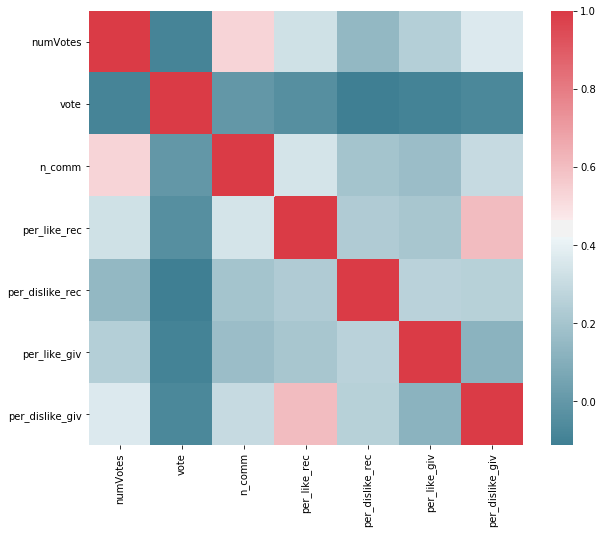

In [104]:
corr = df.drop(['combined', 'stillExists'], axis = 1).corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

##  Model fitting  

### Splitting into training and testing datasets 

In [87]:
y = df['stillExists']
X = df.drop(['stillExists', 'combined'], axis=1)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### During the course of modelling, we had tried out a number of algorithms including Logistic Regression, SVM, KNN and Random Forest. Random Forest seemed to outperform all others in giving the best accuracy and f1_scores. Hence only Random Forest Model is shown below. 

### Random Forest Model

In [89]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
print("Train Accuracy:", rf.score(X_train,y_train))
print("Test Accuracy:", rf.score(X_test, y_test))

Train Accuracy: 0.9445872607826336
Test Accuracy: 0.882420091324201


In [93]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.70      0.44      0.54       138
        1.0       0.90      0.96      0.93       738

avg / total       0.87      0.88      0.87       876



### Hyper-parameter tuning using GridSearchCV 

#### Doing grid search and printing the best hyper-parameters.

In [94]:
rf_params = {'n_estimators': (50,100,150,200,300,500), 'min_samples_leaf': (2,4,6,8,10), 'max_depth': (3,4,5,6,7)}
rf = RandomForestClassifier()
g = GridSearchCV(rf, rf_params, cv=5)
g.fit(X_train, y_train)
print(g.best_params_)

{'max_depth': 6, 'min_samples_leaf': 6, 'n_estimators': 150}


#### Fitting the best model 

In [95]:
rf1 = RandomForestClassifier(max_depth=6, min_samples_leaf=6, n_estimators=150)
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
print("Train Accuracy:", rf1.score(X_train,y_train))
print("Test Accuracy:", rf1.score(X_test, y_test))

Train Accuracy: 0.8774635818337618
Test Accuracy: 0.8984018264840182


In [97]:
y_pred = rf1.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.80      0.48      0.60       138
        1.0       0.91      0.98      0.94       738

avg / total       0.89      0.90      0.89       876



In [99]:
print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_pred))

ROC AUC: 0.728


### We proceed with the model parameters chosen above for the model in the main functions 

## Function Definitions 

### Date Features 

In [106]:
def recent_date_feat(c_employee,c_like,emp_attr,h_level):

    # h_level['voteDate'].head()
    h_level['Date'] = h_level['voteDate'].str.split(' ').str[2]
    h_level['Month'] = h_level['voteDate'].str.split(' ').str[1]
    h_level['Year'] = h_level['voteDate'].str.split(' ').str[5]

    import datetime
    def monthToNum(shortMonth):

        return{
                'Jan' : 1,
                'Feb' : 2,
                'Mar' : 3,
                'Apr' : 4,
                'May' : 5,
                'Jun' : 6,
                'Jul' : 7,
                'Aug' : 8,
                'Sep' : 9, 
                'Oct' : 10,
                'Nov' : 11,
                'Dec' : 12
        }[shortMonth]

    h_level['Month'] = h_level['Month'].apply(monthToNum)
    h_level['date'] = datetime.date(1999,1,1) 

    date = []
    for i, row in h_level.iterrows():
        date.append(datetime.date(int(row['Year']), int(row['Month']), int(row['Date'])))

    h_level['date'] = date

    h_level.sort_values(by = 'date', inplace=True, ascending  = False)
    h_level_uniq = h_level.drop_duplicates(subset ="combined", keep='first', inplace=False)

    emp_attr['lastParticipationDate'].head()
    x = pd.DataFrame()
    emp_attr['Date'] = emp_attr['lastParticipationDate'].str.split(' ').str[2]
    emp_attr['Month'] = emp_attr['lastParticipationDate'].str.split(' ').str[1]
    emp_attr['Year'] = emp_attr['lastParticipationDate'].str.split(' ').str[5]

    import datetime
    def monthToNum(shortMonth):

        return{
                'Jan' : 1,
                'Feb' : 2,
                'Mar' : 3,
                'Apr' : 4,
                'May' : 5,
                'Jun' : 6,
                'Jul' : 7,
                'Aug' : 8,
                'Sep' : 9, 
                'Oct' : 10,
                'Nov' : 11,
                'Dec' : 12
        }[shortMonth]

    emp_attr['Month'] = emp_attr['Month'].apply(monthToNum)
    emp_attr['date'] = datetime.date(1999,1,1) 

    date = []
    for i, row in emp_attr.iterrows():
        date.append(datetime.date(int(row['Year']), int(row['Month']), int(row['Date'])))
    
    emp_attr['date'] = date

    emp_attr.sort_values(by = 'date', inplace=True, ascending  = False)
    emp_attr_uniq = emp_attr.drop_duplicates(subset ="combined", keep='first', inplace=False)

    emp_attr_uniq.sort_values(by = ['combined'], inplace=True)
    h_level_uniq.sort_values(by = ['combined'], inplace=True)
    emp_attr_uniq.reset_index(drop = True, inplace = True)
    h_level_uniq.reset_index(drop = True, inplace = True)

    h = h_level_uniq['vote'] 

    x = pd.DataFrame(data = {'combined':emp_attr_uniq['combined'], 'vote': h, 'numVotes':emp_attr_uniq['numVotes']})

    return x

### Groupby features 

In [109]:
def feature_groupby(c_employee, c_like, emp_attr, h_level):
    # Numvotes
    ndf = emp_attr.groupby(['combined']).mean()
    # Mean happiness level
    ndf['vote'] = h_level.groupby(['combined']).mean()['vote']
    # Number of comments
    ndf['n_comm'] = c_employee.groupby(['combined']).count()['employee']
    #Fill NA values with zero
    ndf.fillna(0, inplace=True)
    
    #Reacts on Comments
    count_react = c_like.groupby(['commentId']).count()['employee']
    count_like = c_like.groupby(['commentId']).sum()['liked']
    count_dislike = c_like.groupby(['commentId']).sum()['disliked']
    c_employee.set_index(['commentId'], inplace=True)
    c_employee['react'] = count_react
    c_employee['liked'] = count_like
    c_employee['disliked'] = count_dislike
    c_employee.fillna(0, inplace=True)
    c_employee.reset_index(inplace=True)
    
    ndf['react_rec'] = c_employee.groupby(['combined']).mean()['react']
    ndf['dislike_rec'] = c_employee.groupby(['combined']).mean()['disliked']
    ndf['like_rec'] = c_employee.groupby(['combined']).mean()['liked']
    
    ndf.fillna(0, inplace=True)
    n_react = c_like.groupby(['combined']).count()['employee']
    n_like_giv = c_like.groupby(['combined']).sum()['liked']
    n_dislike_giv = c_like.groupby(['combined']).sum()['disliked']
    ndf['react_giv'] = n_react
    ndf['dislike_giv'] = n_dislike_giv
    ndf['like_giv'] = n_like_giv
    ndf.fillna(0, inplace=True)
    ndf.reset_index(inplace=True)
    ndf.drop(['employee'], axis=1, inplace=True)
    
    ndf['per_like_rec'] = ndf['like_rec']/(ndf['react_rec']+1)
    ndf['per_dislike_rec'] = ndf['dislike_rec']/(ndf['react_rec']+1)
    ndf['per_like_giv'] = ndf['like_giv']/(ndf['react_giv']+1)
    ndf['per_dislike_giv'] = ndf['dislike_giv']/(ndf['react_giv']+1)
    
    ndf1 = ndf.drop(['like_rec', 'dislike_rec', 'react_rec', 'like_giv', 'dislike_giv', 'react_giv'], axis=1)
    
    return ndf1

### PCA  

In [110]:
def adjacency_matrix(comments_employee, comments_likeability, emp, happiness):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    le.fit(emp['combined'])
    comments_employee['id'] = le.transform(comments_employee['id'])
    comments_likeability['id'] = le.transform(comments_likeability['id'])   # id has been label encoded for ease in manipulation of adj matrix

    adj = np.zeros((len(emp), len(emp)))    # Define adj matrix
    for i in range(len(comments_employee)):  
        a = comments_employee['id'][i]      # iterate over all comments in comments_employee
        b = comments_employee['commentId'][i] 
        c = comments_likeability.loc[comments_likeability['commentId'] == b]  # DataFrame which chooses all the employees who have liked/disliked that particular comment
        r = c.loc[c['liked'] == True]     # DataFrame which filters out the people who've liked that comment
        for y in range(len(r)):
            adj[a][r['id'].iloc[y]] = adj[a][r['id'].iloc[y]] + 1   # Update the adj matrix. Similarity between the 2 employees

    for i in range(adj.shape[0]):
        for j in range(adj.shape[1]):
            adj[i][j] = 1/(adj[i][j]+1)   

    from sklearn.decomposition import PCA
    pca = PCA()              
    pca.fit(adj)
    y = sum(np.cumsum(pca.explained_variance_ratio_)<0.9)
    pca = PCA(y)
    x = pca.fit_transform(adj)      # PCA applied on Adj Matrix
    
    x2 = pd.DataFrame(x)          
    x2['combined'] = le.inverse_transform(range(4377))

    r = emp.merge(x2, on = 'combined')    #  Dataframe updated with the PCA values 
    return adj, r, y

## Main Function

In [132]:
def predict(f1, f2, f3, f4, f1_test, f2_test, f3_test, f4_test):
    
    #Reading in testing files
    c_emp_test = pd.read_csv(f1_test)
    c_like_test = pd.read_csv(f2_test)
    emp_attr_test = pd.read_csv(f3_test)
    h_level_test = pd.read_csv(f4_test)
    
    #Reading in training files
    c_employee = pd.read_csv(f1) #f1 - corresponds to comment_employee_mapping
    c_like = pd.read_csv(f2)     #f2 - corresponds to comments_likeability
    emp_attr = pd.read_csv(f3)   #f3 - corresponds to emp_attrition
    h_level = pd.read_csv(f4)    #f4 - corresponds to happiness_level
    
    #Creating unique IDs for every employee
    h_level['combined'] = h_level['employee'].map(str) + '_' + h_level['companyAlias']
    emp_attr['combined'] = emp_attr['employee'].map(str) + '_' + emp_attr['companyAlias']
    c_like['combined'] = c_like['employee'].map(str) + '_' + c_like['companyAlias']
    c_employee['combined'] = c_employee['employee'].map(str) + '_' + c_employee['companyAlias']
    
    h_level_test['combined'] = h_level_test['employee'].map(str) + '_' + h_level_test['companyAlias']
    emp_attr_test['combined'] = emp_attr_test['employee'].map(str) + '_' + emp_attr_test['companyAlias']
    c_like_test['combined'] = c_like_test['employee'].map(str) + '_' + c_like_test['companyAlias']
    c_emp_test['combined'] = c_emp_test['employee'].map(str) + '_' + c_emp_test['companyAlias']
    
    #Creating the groupby features using the feature_groupby function defined above
    data = feature_groupby(c_employee, c_like, emp_attr, h_level)
    data_test = feature_groupby(c_emp_test, c_like_test, emp_attr_test, h_level_test)
    
    #Creating the date features using the recent_data_feat function defined above
    date_feature = recent_date_feat(c_employee, c_like, emp_attr, h_level)
    date_feature_test = recent_date_feat(c_emp_test, c_like_test, emp_attr_test, h_level_test)
    
    #Appending another column 'recent_vote' from the date_features into data
    data['recent_vote'] = date_feature['vote']
    data_test['recent_vote'] = date_feature_test['vote']
    
    data['stillExists'].loc[data['stillExists']<1]=0
    
    y = data['stillExists']
    X = data.drop(['stillExists', 'combined'], axis=1)
    
    if('stillExists' in data_test.columns):
        X_test = data_test.drop(['combined', 'stillExists'], axis=1)
    else:
        X_test = data_test.drop(['combined'], axis=1)
        
    rf = RandomForestClassifier(max_depth=6, min_samples_leaf=6, n_estimators=150)
    rf.fit(X,y)
    
    pred = rf.predict(X_test)
    
    return pred

# Test call - Calling the predict function on the same dataset (given for the project)

In [133]:
# Enter the paths of the training files instead of ... here
f1 = 'comments_employee_mapping.csv'
f2 = 'comments_likeability.csv'
f3 = 'employee_attrition.csv'
f4 = 'happiness_level.csv'

# Enter the paths of the corresponding test files here. These paths go into the function below.
f1_test = 'comments_employee_mapping.csv'
f2_test = 'comments_likeability.csv'
f3_test = 'employee_attrition.csv'
f4_test = 'happiness_level.csv'

In [134]:
pred = predict(f1, f2, f3, f4, f1_test, f2_test, f3_test, f4_test)

C:\Users\amanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\amanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\amanj\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [136]:
pred

array([1., 0., 1., ..., 1., 1., 1.])

In [139]:
print(classification_report(y, pred))

             precision    recall  f1-score   support

        0.0       0.74      0.42      0.53       707
        1.0       0.90      0.97      0.93      3670

avg / total       0.87      0.88      0.87      4377



In [140]:
print(accuracy_score(y, pred))

0.8818825679689285


In [141]:
print(roc_auc_score(y, pred))

0.6943228285459919


# Actual Call

In [ ]:
# Enter the paths of the training files instead of ... here
f1 = '.../comments_employee_mapping.csv'
f2 = '.../comments_likeability.csv'
f3 = '.../employee_attrition.csv'
f4 = '.../happiness_level.csv'

# Enter the paths of the corresponding test files here. These paths go into the function below. 
f1_test = '.../'
f2_test = '.../'
f3_test = '.../'
f4_test = '.../'